In [110]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [75]:
#df_stage = pd.read_csv("../results/gene_exp_analysis/cnv_genes_exp_stage.combine.csv",
                 #header=0,sep="\t")
df = pd.read_csv("../results/gene_exp_analysis/cnv_genes_exp.combine.csv",
                 header=0,sep="\t")
label = pd.read_csv("../results/gene_exp_analysis/clinical.csv",
                    header=0,sep="\t")

In [76]:
df.shape

(246, 423)

In [77]:
label

,sample,OS,X_PATIENT,OS.time,stage
0,TCGA.2F.A9KO.01A,1,TCGA-2F-A9KO,734,4
1,TCGA.2F.A9KP.01A,1,TCGA-2F-A9KP,364,4
2,TCGA.2F.A9KQ.01A,0,TCGA-2F-A9KQ,2886,3
3,TCGA.2F.A9KR.01A,1,TCGA-2F-A9KR,3183,3
4,TCGA.2F.A9KT.01A,0,TCGA-2F-A9KT,2352,2
...,...,...,...,...,...
417,TCGA.ZF.AA56.01A,1,TCGA-ZF-AA56,259,3
418,TCGA.ZF.AA58.01A,0,TCGA-ZF-AA58,1649,4
419,TCGA.ZF.AA5H.01A,0,TCGA-ZF-AA5H,897,4
420,TCGA.ZF.AA5N.01A,1,TCGA-ZF-AA5N,168,4


In [78]:
label["OS"].value_counts()

OS
0    232
1    190
Name: count, dtype: int64

In [79]:
df["genes"]

0      ENSG00000003137
1      ENSG00000004776
2      ENSG00000006659
3      ENSG00000006788
4      ENSG00000007216
            ...       
241    ENSG00000251544
242    ENSG00000252277
243    ENSG00000253057
244    ENSG00000253934
245    ENSG00000254934
Name: genes, Length: 246, dtype: object

In [80]:
genes_ensemble_id = df["genes"]
df = df.drop(["genes"],axis=1)
#genes_ensemble_id_stage = df_stage["genes"]
#df_stage = df_stage.drop(["genes"],axis=1)

In [81]:
df = df.T
#df.rename(columns=genes_ensemble_id,inplace=True)
# df_stage = df_stage.T
# df_stage.rename(columns=genes_ensemble_id_stage,inplace=True)

In [82]:
df

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
TCGA.2F.A9KO.01A,37.660194,673.452886,0.000000,2.215306,5.538264,815.232441,1195.157342,6540.689623,1881.902061,1741.230159,...,0.0,1.107653,0.000000,5.538264,6.645917,0.000000,0.000000,0.000000,0.000000,0.0
TCGA.2F.A9KP.01A,18.309193,153.131434,0.000000,2.496708,1.664472,257.160941,1639.505029,11155.292088,1542.965647,2940.289984,...,0.0,0.000000,0.000000,4.993416,1260.837624,0.000000,1.664472,0.000000,0.000000,0.0
TCGA.2F.A9KQ.01A,33.248667,30.314961,2.933706,0.977902,0.000000,165.265433,1716.217955,13077.483029,3003.136946,2985.534711,...,0.0,0.000000,0.000000,6.845314,507.531122,0.977902,0.977902,0.000000,0.977902,0.0
TCGA.2F.A9KR.01A,28.904496,355.355269,0.000000,8.501322,1.700264,232.086097,2146.583861,4040.678452,836.530107,5689.934963,...,0.0,0.850132,0.000000,1.700264,8.501322,1.700264,0.000000,0.850132,0.000000,0.0
TCGA.2F.A9KT.01A,281.329823,88.283417,0.000000,7.062673,0.000000,374.321689,5523.010577,4606.040151,1569.090601,4303.522308,...,0.0,1.177112,0.000000,2.354224,16.479571,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.ZF.AA56.01A,808.254133,163.911677,0.000000,2.826063,0.942021,697.095639,2208.097539,9813.976177,2045.127883,4111.922251,...,0.0,0.000000,0.000000,4.710106,439.923870,0.000000,0.000000,0.000000,0.000000,0.0
TCGA.ZF.AA58.01A,295.597267,190.399416,0.869404,11.302248,0.000000,1022.418783,1832.703057,11470.043373,2235.236983,7213.442724,...,0.0,0.000000,0.000000,0.869404,360.802547,0.000000,0.000000,0.000000,0.000000,0.0
TCGA.ZF.AA5H.01A,202.668920,117.992180,0.000000,8.328860,0.000000,541.375883,1420.764657,8314.978303,3356.530474,2968.544424,...,0.0,0.694072,0.000000,4.858502,880.776917,0.000000,0.000000,0.694072,0.000000,0.0
TCGA.ZF.AA5N.01A,1855.540230,15.259377,0.000000,0.000000,0.000000,3277.714156,6653.088323,20908.398212,2417.085299,6717.177706,...,0.0,0.000000,0.000000,3.051875,1327.565789,0.000000,0.000000,0.000000,0.000000,0.0


In [83]:
label= label.set_index('sample')

In [36]:
label

,OS,X_PATIENT,OS.time,stage
sample,,,,
TCGA.2F.A9KO.01A,1,TCGA-2F-A9KO,734,4
TCGA.2F.A9KP.01A,1,TCGA-2F-A9KP,364,4
TCGA.2F.A9KQ.01A,0,TCGA-2F-A9KQ,2886,3
TCGA.2F.A9KR.01A,1,TCGA-2F-A9KR,3183,3
TCGA.2F.A9KT.01A,0,TCGA-2F-A9KT,2352,2
...,...,...,...,...
TCGA.ZF.AA56.01A,1,TCGA-ZF-AA56,259,3
TCGA.ZF.AA58.01A,0,TCGA-ZF-AA58,1649,4
TCGA.ZF.AA5H.01A,0,TCGA-ZF-AA5H,897,4


In [84]:
death_label=np.array([])
for sample in df.index:
    death_label = np.append(death_label,label.loc[sample]["OS"])

In [85]:
death_label

array([1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 0.

In [86]:
X = df
y = death_label
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [40]:
from sklearn.manifold import TSNE
import plotly.express as px


features = X

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=y
)
fig.show()

In [41]:
from umap import UMAP
import plotly.express as px

umap_2d = UMAP(n_components=2, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(X)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=y
)

fig_2d.show()


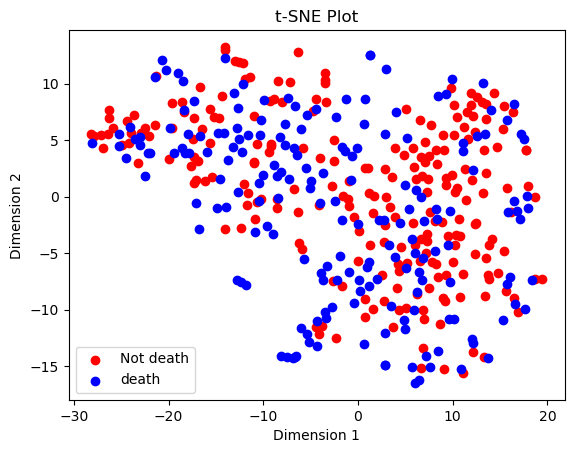

In [42]:
from sklearn.manifold import TSNE
# Assuming your data is stored in the variable 'data'
tsne = TSNE(n_components=2)
embedded_data = tsne.fit_transform(X)

# Step 2: Separate data points by class
class_1_indices = np.where(y == 0)[0]
class_2_indices = np.where(y == 1)[0]

class_1_data = embedded_data[class_1_indices]
class_2_data = embedded_data[class_2_indices]

# Step 3: Plot the t-SNE plot with different colors for each class
plt.scatter(class_1_data[:, 0], class_1_data[:, 1], color='red', label='Not death')
plt.scatter(class_2_data[:, 0], class_2_data[:, 1], color='blue', label='death')

plt.title('t-SNE Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model=RandomForestClassifier(random_state=42)

# defining parameter range
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,12,14,16,20],
    'criterion' :['gini', 'entropy']
}

In [142]:
from sklearn.linear_model import RidgeClassifier
model=RidgeClassifier()
param_grid = {'alpha':[0.001,0.01,0.1,1 ]}

In [134]:
model = xgb.XGBClassifier(random_state=42)

# Defining parameter range
param_grid = {
    'max_depth': [3],
    'learning_rate': [0.1 ,0.01, 0.001],
    'n_estimators': [100],
    'gamma': [ 0.1,0.01,0.001],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [ 0.5, 0.8]
}

In [143]:
grid = GridSearchCV(model, param_grid, refit = True, verbose = 1)
  
# fitting the model for grid search
grid.fit(X_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
              precision    recall  f1-score   support

         0.0       0.53      0.52      0.53        63
         1.0       0.54      0.55      0.54        64

    accuracy                           0.54       127
   macro avg       0.54      0.54      0.54       127
weighted avg       0.54      0.54      0.54       127



In [144]:
def roc(X_train,y_train,model,label):
    cv = StratifiedKFold(n_splits=6)
    classifier = model
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(6, 6))
    for fold, (train, test) in enumerate(cv.split(X_train, y_train)):
        classifier.fit(X_train.iloc[train], y_train[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X_train.iloc[test],
            y_train[test],
            name=f"ROC fold {fold}",
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
    ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=label,
    )
    ax.axis("square")
    ax.legend(loc="lower right")
    plt.show()


In [145]:
model

RidgeClassifier()

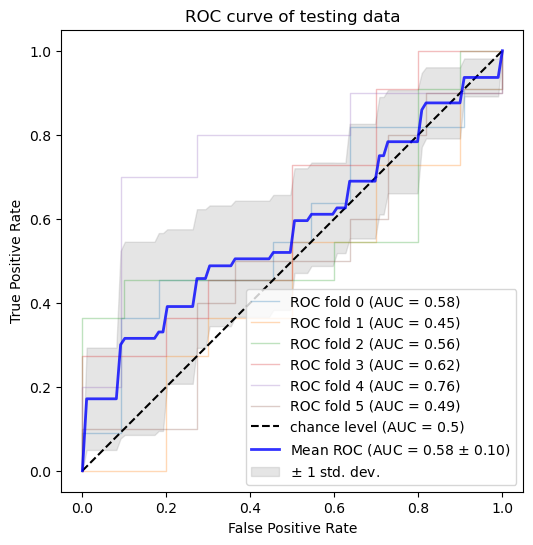

In [146]:
model = grid.best_estimator_
label="ROC curve of testing data"
roc(X_test,y_test,model,label)

In [47]:
model_RF = grid.best_estimator_
model_RF.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [48]:
# for important features:
important_feat = model_RF.feature_importances_
#get indices of those important features
idx = important_feat.argsort(kind= "quicksort")
idx= idx[::-1][:18]

In [49]:
genes_ensemble_id[idx]

113    ENSG00000162729
217    ENSG00000232612
82     ENSG00000143369
36     ENSG00000114480
56     ENSG00000134014
93     ENSG00000148840
174    ENSG00000188542
5      ENSG00000007237
46     ENSG00000125498
89     ENSG00000147647
76     ENSG00000139178
39     ENSG00000116001
6      ENSG00000012232
150    ENSG00000173239
1      ENSG00000004776
88     ENSG00000145916
119    ENSG00000164045
11     ENSG00000072818
Name: genes, dtype: object

ENSG00000184697
ENSG00000237412
ENSG00000265787
ENSG00000277586